# The Sparks Foundation - GRIP - Data Science and Business Analytics -                      April 2022

# Task 1 :- Prediction Using Supervised ML

# Author : Vaibhav Ramteke

### Problem Statement : Predict the percentage of a student based on the no. of study hours.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [17]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Extracting Data

In [18]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [19]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [20]:
student_data.shape

(25, 2)

In [21]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the data for Data visualisation

Let's plot our data points on graph to eyeball our dataset and see if we can manually find any relationship between the data. 
We can create the plot with the following script:

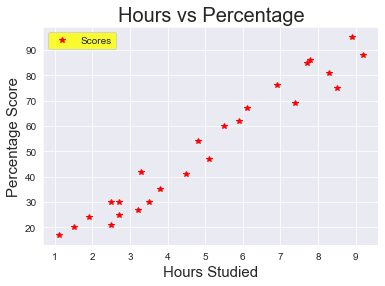

In [22]:
# Plotting the distribution of scores
sb.set_style("darkgrid")
student_data.plot(x="Hours",y="Scores", style='r*')
plt.title("Hours vs Percentage",{"size":20})
plt.xlabel("Hours Studied",{"size":15})
plt.ylabel("Percentage Score",{"size":15})
plt.legend(facecolor="yellow")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied 
and percentage of score.

### Preparing the data

 The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [23]:
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the given Dataset

We have split our data into training and testing sets, and now is finally the time to train our dataset.

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Plotting the regression line

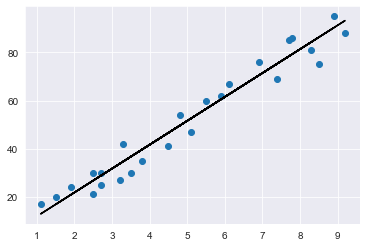

In [26]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plot for the test data
plt.scatter(x,y)
plt.plot(x,line,"k");
plt.show()

### Predicting the Data

In [27]:
print(x_test)  # Testing data - In Hours
y_pred = lr.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing the Actual vs Predicted Data

In [28]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy of Data

In [29]:
accuracy = lr.score(x_test,y_test)*100
print("Accuracy of data in percentage:",accuracy)

Accuracy of data in percentage: 94.54906892105355


### Testing data with example

In [30]:
hours = [[9.25]]
prediction = lr.predict(hours)
print("No of Hours:{}".format(hours))
print("Predicted Score:{}".format(prediction[0]))

No of Hours:[[9.25]]
Predicted Score:93.69173248737535


### Evaluating the model

In [31]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
